### Reading the data

The new data set is too large for uploading to Github (200+ Mb). Therefore I upload zip and read from zip

In [12]:
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zf = zipfile.ZipFile('../Data/Base.csv.zip') 
df = pd.read_csv(zf.open('Base.csv'))

### Explore and clean the data

This data is a large and relatively clean one, there is not a lot of things to do.

In [3]:
df.shape

(1000000, 32)

In [15]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,7.463650e+05,746365.000000,746365.000000,746365.000000,...,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000,746365.000000
mean,0.009230,0.569965,0.491877,15.022553,89.358749,33.817127,7.392632e-01,11.709199,1588.422520,5714.878185,...,0.436411,0.894771,14.862618,0.236096,526.775170,0.026730,7.475012,0.581054,1.017763,3.238787
std,0.095629,0.288377,0.293565,41.993538,89.522997,12.123909,4.067651e+00,22.311299,1021.923527,3070.753408,...,0.495940,0.306848,11.527847,0.424682,494.098534,0.161292,7.894665,0.493387,0.160692,2.242126
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,0.000000,1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.300000,0.209799,-1.000000,22.000000,20.000000,7.366963e-03,-1.140740,905.000000,3427.304020,...,0.000000,1.000000,1.000000,0.000000,200.000000,0.000000,3.127926,0.000000,1.000000,1.000000
50%,0.000000,0.600000,0.499232,-1.000000,54.000000,30.000000,1.540309e-02,-0.736193,1265.000000,5352.884294,...,0.000000,1.000000,15.000000,0.000000,200.000000,0.000000,5.060577,1.000000,1.000000,3.000000
75%,0.000000,0.800000,0.758219,10.000000,137.000000,40.000000,2.611581e-02,21.036317,1941.000000,7811.964112,...,1.000000,1.000000,28.000000,0.000000,510.000000,0.000000,8.793082,1.000000,1.000000,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.657727e+01,112.956928,6700.000000,16715.565404,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


The binary distribution of fraud is unproportional, need to pay more attention when constructing the train test split

In [5]:
df['fraud_bool'].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

The column __device_fraud_count__ is useless, and therefore drop it.

In [6]:
df = df.drop(['device_fraud_count'], axis=1) 

Metadata explicitly states that three columns, __prev_address_months_count__, __current_address_months_count__, and __bank_months_count__ will take an value of -1 if missing.

There are a few other colums for which -1 are presented but the meaning of -1 is not explicitly stated.

Further examination is needed to determine what to do with them.

__prev_address_months_count__ does not shown to contain much information, it should be droped for convinence.

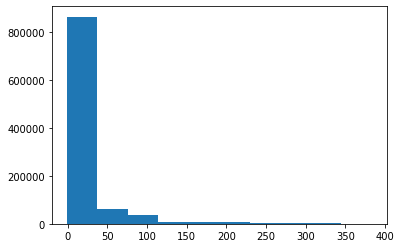

In [7]:
_ = plt.hist(df.prev_address_months_count)

No row of __current_address_months_count__ is taking value -1, therefore do nothing.

In [8]:
df.current_address_months_count.value_counts()

6      16376
7      16270
8      16089
5      15896
9      15688
       ...  
403        1
428        1
413        1
414        1
409        1
Name: current_address_months_count, Length: 423, dtype: int64

__bank_months_count__ seems to contain a lot of useful informations. However, 1/4 of data is missing.

For simplicity, will just drop them for now. Later on, can try interpolate, etc.

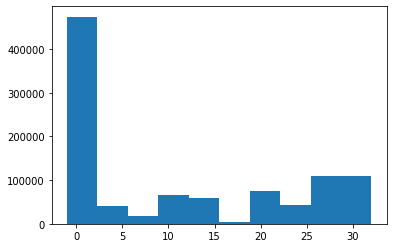

In [9]:
_ = plt.hist(df.bank_months_count)

In [10]:
df.bank_months_count.value_counts()

-1     253635
 1     194802
 28     80082
 15     59141
 30     50777
 31     46084
 25     40450
 10     37158
 20     30850
 21     29098
 5      28001
 2      25836
 26     24779
 11     23745
 6      17678
 29     11696
 3       8580
 19      8212
 22      6741
 9       4801
 16      4563
 27      4197
 4       3834
 24      1822
 12      1121
 7        931
 14       493
 18       491
 23       320
 32        46
 8         30
 17         4
 13         2
Name: bank_months_count, dtype: int64

In [11]:
df = df[df.bank_months_count != -1]

### Overview of the data

I found the fraud data is too small that it can't even shown in plots

In [ ]:
# Place holder for further work

### Data preparation

Train test split using stratify and assigning Xs, ys.

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(['fraud_bool'],axis=1)
y = df.fraud_bool

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)